In [169]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np


In [170]:
# mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [171]:
#read the file
df = pd.read_csv("/content/report_eng(Beaches).csv", sep = ";")

In [172]:
#check the five top rows
df.head()

,Beach code,Beach,X,Y,Orientation (Codice),Orientation,Region,Country
0,40,Aciddara,"13,53734493","38,08036623",SE,Sud-Est,NaN,Italia
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371","40,63355879",NW,Nord-Ovest,NaN,Italia
2,59,baia delle favole,"9,391254298","44,27072752",W,Ovest,NaN,Italia
3,123,Boschetto Steccato di Cutro,"16,93195671","38,93462782",NaN,NaN,NaN,Italia
4,105,Cala Santa Maria,"13,19533405","38,70891163",NaN,NaN,NaN,Italia


In [173]:
# drop some unnecessary columns
df.drop("Orientation", axis = 1, inplace = True)

In [175]:
df.drop("Region", axis = 1, inplace = True)

KeyError: "['Region'] not found in axis"

In [176]:
df.drop("Country", axis = 1, inplace = True)

In [ ]:
df.head(20)

,Beach code,Beach,X,Y,Orientation (Codice)
0,40,Aciddara,"13,53734493","38,08036623",SE
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371","40,63355879",NW
2,59,baia delle favole,"9,391254298","44,27072752",W
3,123,Boschetto Steccato di Cutro,"16,93195671","38,93462782",NaN
4,105,Cala Santa Maria,"13,19533405","38,70891163",NaN
5,142,Caletta Caretta,"17,77187437","40,72236478",SE
6,102,Caletta di Sant'Elia,"13,53882176","38,09654187",NaN
7,46,Capo Arena- budda beach,"15,7836628","39,87517777",NaN
8,139,Capocolonna,"17,20197201","39,02695205",NaN
9,98,Capparrina,"12,9717958","37,55420904",SE


In [177]:
# Group the beach orientation regarding their location
df["General Region"] = np.select(
    [
        df["Orientation (Codice)"].isin(["N", "NE", "NW"]),
        df["Orientation (Codice)"].isin(["S", "SE", "SW"]),
        df["Orientation (Codice)"] == "E",
        df["Orientation (Codice)"] == "W",
    ],
    ["North", "South", "East", "West"],
    default=None
)

In [178]:
df.head()

,Beach code,Beach,X,Y,Orientation (Codice),General Region
0,40,Aciddara,"13,53734493","38,08036623",SE,South
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371","40,63355879",NW,North
2,59,baia delle favole,"9,391254298","44,27072752",W,West
3,123,Boschetto Steccato di Cutro,"16,93195671","38,93462782",NaN,None
4,105,Cala Santa Maria,"13,19533405","38,70891163",NaN,None


In [179]:
# drop the column that has some none values
df.drop("Orientation (Codice)", axis = 1, inplace = True)

In [180]:
df.head()

,Beach code,Beach,X,Y,General Region
0,40,Aciddara,"13,53734493","38,08036623",South
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371","40,63355879",North
2,59,baia delle favole,"9,391254298","44,27072752",West
3,123,Boschetto Steccato di Cutro,"16,93195671","38,93462782",None
4,105,Cala Santa Maria,"13,19533405","38,70891163",None


In [181]:
# manually adding the region for the NAs:

na_beach = (
    df.loc[df["General Region"].isna(), "Beach"]
      .dropna()
      .unique()
)

na_beach

array(['Boschetto Steccato di Cutro ', 'Cala Santa Maria',
       "Caletta di Sant'Elia", 'Capo Arena- budda beach', 'Capocolonna',
       'Club Adriatico C.da Fontanelle  Polignano a Mare ',
       'da Marinella di Selinunte alla Foce del Fiume Belice, sponda destra e sinistra verso Menfi',
       "Foce dell'Irno", 'Lido di Ostia', 'Lido di Sciacca',
       'Marina di Pisa', 'Marinella di San Terenzo',
       'Mondragone Spiaggia Lungomare Sinope',
       'Mondragone zona Fiumarella',
       'Oasi del Fratino e della Camomilla di mare', 'Porto Kaleo',
       'RISERVA BORSACCHIO', 'Sampieri', 'San Bennato',
       'San Leonardo di Cutro', "Spiaggia Capo D'armi ",
       'Spiaggia di Castrocucco di Maratea', 'spiaggia di Sovereto',
       'Spiaggia Lido La Duna ',
       'Spiaggia Lido San Giuliano di Rimini e zona darsena',
       'Strongoli marina', 'Tordigliano'], dtype=object)

In [182]:
# set for each beach the location
location = { "Boschetto Steccato di Cutro ": "South", "Cala Santa Maria": "South",  "Caletta di Sant'Elia" : "South",
                    "Capo Arena- budda beach" : "South", "Capocolonna" : "South", "Club Adriatico C.da Fontanelle  Polignano a Mare " : "South",
                    "da Marinella di Selinunte alla Foce del Fiume Belice, sponda destra e sinistra verso Menfi" : "South",
                    "Foce dell'Irno" : "South", "Lido di Ostia" : "South", "Lido di Sciacca" : "South", "Marina di Pisa" : "North",
                    "Marinella di San Terenzo" : "North", "Mondragone Spiaggia Lungomare Sinope" : "South", "Mondragone zona Fiumarella" : "South",
                    "Oasi del Fratino e della Camomilla di mare" : "North", "Porto Kaleo" : "South", "RISERVA BORSACCHIO" : "North", "Sampieri" : "South",
                    "San Bennato" : "North",  "San Leonardo di Cutro" : "South", "Spiaggia Capo D'armi " : "South", "Spiaggia di Castrocucco di Maratea" : "South",
                    "spiaggia di Sovereto":"South", "Spiaggia Lido La Duna ":"South", "Spiaggia Lido San Giuliano di Rimini e zona darsena" : "North",
                    "Strongoli marina":"South", "Tordigliano":"South"}

df.loc[df["General Region"].isna(), "General Region"] = (
    df.loc[df["General Region"].isna(), "Beach"].map(location)
)
df.head(10)

,Beach code,Beach,X,Y,General Region
0,40,Aciddara,"13,53734493","38,08036623",South
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371","40,63355879",North
2,59,baia delle favole,"9,391254298","44,27072752",West
3,123,Boschetto Steccato di Cutro,"16,93195671","38,93462782",South
4,105,Cala Santa Maria,"13,19533405","38,70891163",South
5,142,Caletta Caretta,"17,77187437","40,72236478",South
6,102,Caletta di Sant'Elia,"13,53882176","38,09654187",South
7,46,Capo Arena- budda beach,"15,7836628","39,87517777",South
8,139,Capocolonna,"17,20197201","39,02695205",South
9,98,Capparrina,"12,9717958","37,55420904",South


In [183]:
df["Y"] = (
    df["Y"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)

df["Y"] = pd.to_numeric(df["Y"], errors="coerce")


In [184]:
df.head(4)

,Beach code,Beach,X,Y,General Region
0,40,Aciddara,"13,53734493",38.080366,South
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371",40.633559,North
2,59,baia delle favole,"9,391254298",44.270728,West
3,123,Boschetto Steccato di Cutro,"16,93195671",38.934628,South


In [185]:
# using the latitude of the city of Pescara as our reference point and splitting the East and West beaches as North/South
split_lat = 42.73092921331351


# split the "East" beaches into North/South
df.loc[(df["General Region"] == "East") & (df["Y"] > split_lat), "General Region"] = "North"
df.loc[(df["General Region"] == "East") & (df["Y"] <= split_lat), "General Region"] = "South"

# do the same for "West" beaches
df.loc[(df["General Region"] == "West") & (df["Y"] > split_lat), "General Region"] = "North"
df.loc[(df["General Region"] == "West") & (df["Y"] <= split_lat), "General Region"] = "South"


In [186]:
df.head()

,Beach code,Beach,X,Y,General Region
0,40,Aciddara,"13,53734493",38.080366,South
1,149,Bagni della Regina Giovanna - Sorrento (Na),"14,35122371",40.633559,North
2,59,baia delle favole,"9,391254298",44.270728,North
3,123,Boschetto Steccato di Cutro,"16,93195671",38.934628,South
4,105,Cala Santa Maria,"13,19533405",38.708912,South


### Find the correlation of trash with other factors such beach length and Season

In [187]:
beaches_df = pd.read_csv("/content/materials-record.csv", encoding='windows-1252', sep = ";")

In [188]:
#check the beaches
beaches_df.head(10)

,Beach,Date of collection,Period,length,Trash amount,Beach was cleaned,The last time that beach has been cleaned,The last time that was cleaned from another group,further from the reference point above 100 meters,"Durante il tracciamento - registrazione, ti allontani dal punto preimpostato di 100 m (Descrizione)",...,Numero di animali abbandonati o morti,Descrizione degli animali,Sesso animale,Età dell'animale,Animale impigliato nei rifiuti,Animale impigliato nei rifiuti (Descrizione),Vivo o morto,Eventi o situazioni che potrebbero aver influenzato la registrazione,Eventi o situazioni che potrebbero aver portato all'aumento dei rifiuti sulla spiaggia,Fenomeno meteorologico
0,Aciddara,12/05/2025,Spring 2025,"149,53",1794,True,NaN,False,False,NaN,...,2.0,Tonno e Gabbiano Reale,NaN,NaN,False,NaN,dead,NaN,NaN,NaN
1,Aciddara,13/07/2025,Summer 2025,"149,53",236,True,12/04/2024,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aciddara,30/12/2025,Winter 2025-2026,"149,53",552,False,13/07/2025,False,True,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bagni della Regina Giovanna - Sorrento (Na),14/12/2025,Winter 2025-2026,"9,39",738,True,NaN,False,False,NaN,...,1.0,Delfino,NaN,Esemplare giovane,NaN,NaN,dead,Si ritiene che le pioggie copiose della settim...,NaN,NaN
4,Boschetto Steccato di Cutro,09/07/2025,Summer 2025,"35,21",418,True,18/07/2025,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,',NaN,NaN
5,Boschetto Steccato di Cutro,05/09/2025,Autumn 2025,"35,21",181,True,NaN,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cala Santa Maria,08/06/2025,Summer 2025,"70,84",138,True,14/03/2025,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Caletta Caretta,07/07/2025,Summer 2025,"105,97",159,True,NaN,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Caletta Caretta,02/08/2025,Summer 2025,"105,97",65,True,NaN,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Caletta di Sant'Elia,22/05/2025,Spring 2025,"18,38",242,True,22/05/2025,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
#check the types of the columns and the size of the dataset
beaches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Beach                                                                                                240 non-null    object 
 1   Date of collection                                                                                   240 non-null    object 
 2   Period                                                                                               240 non-null    object 
 3   length                                                                                               240 non-null    object 
 4   Trash amount                                                                                         240 non-n

In [190]:
# Convert "Trash amount" from string to numeric BEFORE grouping
beaches_df['Trash amount'] = pd.to_numeric(beaches_df['Trash amount'], errors='coerce')

In [191]:
#Group by the Trash amount that is found per beach
Liter_per_beach = beaches_df.groupby("Beach")["Trash amount"].sum().reset_index()

In [192]:
Liter_per_beach.head(4)

,Beach,Trash amount
0,Plage de Eduard,180.0
1,Aciddara,2582.0
2,Bagni della Regina Giovanna - Sorrento (Na),738.0
3,Boschetto Steccato di Cutro,599.0


In [193]:
# Replace comma with dot and convert to float
Liter_per_beach["Trash amount"] = Liter_per_beach["Trash amount"].astype(str).str.replace(',', '.').astype(float)

Liter_per_beach["Trash amount"].astype(int)

#sort them and select the top 10
top10 = Liter_per_beach.sort_values(by = "Trash amount",ascending=False)

In [194]:
# Top 10 beaches with most trash
top_beaches = top10.head(10)
top_beaches = top_beaches.sort_values(by= "Trash amount", ascending= True)

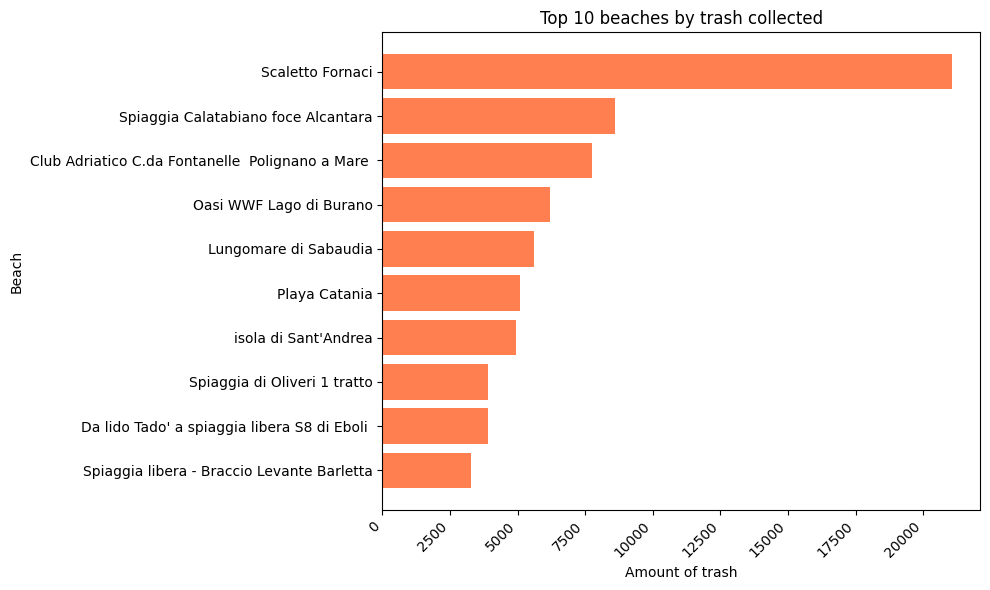

In [195]:
#make a plot for the top 10 beaches
# setting a figure
plt.figure(figsize=(10,6))

#type of the plot
plt.barh(top_beaches["Beach"], top_beaches["Trash amount"], color = "coral")

#setting a title
plt.title("Top 10 beaches by trash collected")

plt.xlabel("Amount of trash")
plt.ylabel("Beach")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

In [196]:
# merge the dataframe that has information about the trash
# with the dataframe that has the location
merged_litter = pd.merge(Liter_per_beach, df, on="Beach", how="right")


In [197]:
# drop some missing values
merged_litter = merged_litter.dropna()


In [198]:
merged_litter.head()

,Beach,Trash amount,Beach code,X,Y,General Region
0,Aciddara,2582.0,40,"13,53734493",38.080366,South
1,Bagni della Regina Giovanna - Sorrento (Na),738.0,149,"14,35122371",40.633559,North
3,Boschetto Steccato di Cutro,599.0,123,"16,93195671",38.934628,South
4,Cala Santa Maria,138.0,105,"13,19533405",38.708912,South
5,Caletta Caretta,224.0,142,"17,77187437",40.722365,South


In [199]:
#group the average amount of trash based on South or North location
mean_trash = merged_litter.groupby("General Region")["Trash amount"].mean()

print(mean_trash)

General Region
North    1074.84
South    1534.60
Name: Trash amount, dtype: float64


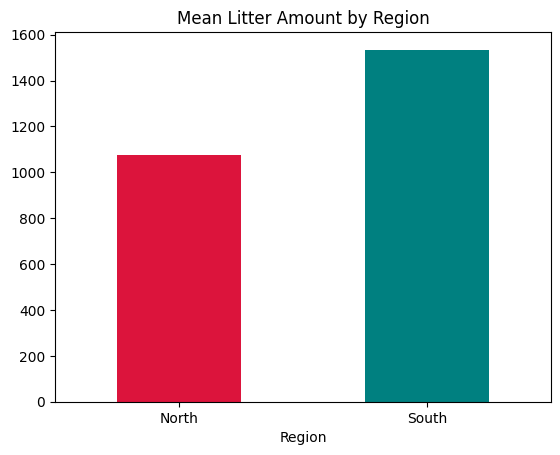

In [200]:
# make a plot
mean_trash.plot(kind = "bar", color=["crimson", "teal"])

plt.title("Mean Litter Amount by Region")

plt.xlabel("Region")

plt.xticks(rotation=0)

plt.show()

In [201]:
#Trash per period
trash_per_beach_period = beaches_df.groupby("Period")["Trash amount"].sum().reset_index()

In [202]:
#chech the first top five columns
trash_per_beach_period.head(5)

,Period,Trash amount
0,Autumn 2024,6842.0
1,Autumn 2025,45768.0
2,Spring 2024,610.0
3,Spring 2025,18842.0
4,Summer 2024,3205.0


In [203]:
#Bring the names into the same consistency
trash_per_beach_period["Period"] = trash_per_beach_period["Period"].replace({
"Winter 2024-2025" : "Winter 2024",
"Winter 2025-2026" : "Winter 2025"  })

In [ ]:
trash_per_beach_period.head(5)

,Period,Trash amount
0,Autumn 2024,6842.0
1,Autumn 2025,45768.0
2,Spring 2024,610.0
3,Spring 2025,18842.0
4,Summer 2024,3205.0


In [204]:
#check their categories
trash_per_beach_period.info()

#change the data type of the
trash_per_beach_period.astype({"Trash amount": int})
trash_per_beach_period.astype({"Period" : 'category'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Period        8 non-null      object 
 1   Trash amount  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


,Period,Trash amount
0,Autumn 2024,6842.0
1,Autumn 2025,45768.0
2,Spring 2024,610.0
3,Spring 2025,18842.0
4,Summer 2024,3205.0
5,Summer 2025,31192.0
6,Winter 2024,4771.0
7,Winter 2025,19242.0


In [205]:
order = [
    "Winter 2024",
    "Spring 2024",
    "Summer 2024",
    "Autumn 2024",
    "Winter 2025",
    "Spring 2025",
    "Summer 2025",
    "Autumn 2025",
]

trash_per_beach_period = trash_per_beach_period[trash_per_beach_period['Period'].isin(order)]          # keep only the wanted periods
trash_per_beach_period['Period'] = pd.Categorical(trash_per_beach_period['Period'], categories=order, ordered=True)
trash_per_beach_period = trash_per_beach_period.sort_values('Period')              # sort by the defined order

In [206]:
trash_per_beach_period.head(10)


,Period,Trash amount
6,Winter 2024,4771.0
2,Spring 2024,610.0
4,Summer 2024,3205.0
0,Autumn 2024,6842.0
7,Winter 2025,19242.0
3,Spring 2025,18842.0
5,Summer 2025,31192.0
1,Autumn 2025,45768.0


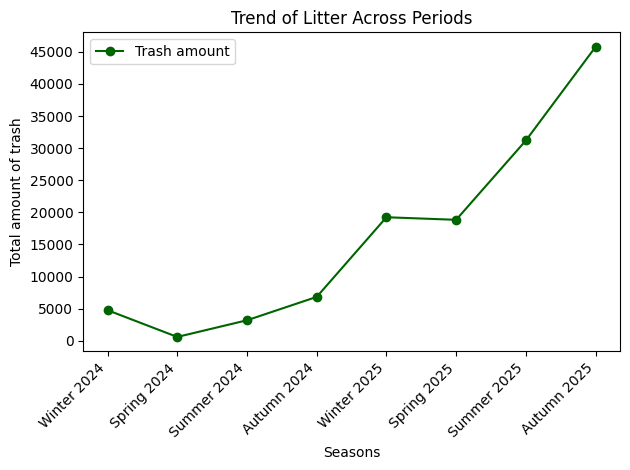

In [207]:
#make a plot that shows a temporal trend regarding the trash amount

trash_per_beach_period.plot(x='Period', y='Trash amount', kind='line', marker='o', color = "darkgreen")

plt.title("Trend of Litter Across Periods")
plt.xlabel("Seasons")
plt.ylabel("Total amount of trash")

plt.yticks(range(0, int(trash_per_beach_period['Trash amount'].max())+1, 5000))
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()



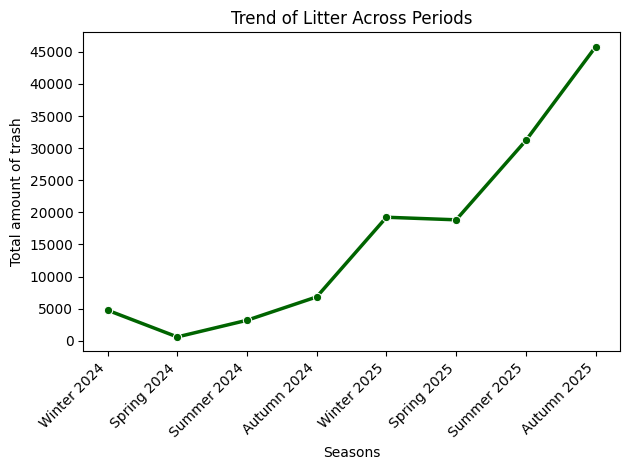

In [208]:
# make again the same plot but using seaborn instead of matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trash_per_beach_period, x='Period', y='Trash amount',
             marker='o', color='darkgreen', linewidth=2.5)

plt.title("Trend of Litter Across Periods")
plt.xlabel("Seasons")
plt.ylabel("Total amount of trash")
plt.yticks(range(0, int(trash_per_beach_period['Trash amount'].max())+1, 5000))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [209]:
#Checking if the length of the beach has a correlation with the pollution
top10.head(10)

,Beach,Trash amount
57,Scaletto Fornaci,21043.0
61,Spiaggia Calatabiano foce Alcantara,8603.0
14,Club Adriatico C.da Fontanelle Polignano a Mare,7738.0
37,Oasi WWF Lago di Burano,6196.0
28,Lungomare di Sabaudia,5594.0
42,Playa Catania,5081.0
93,isola di Sant'Andrea,4943.0
78,Spiaggia di Oliveri 1 tratto,3910.0
15,Da lido Tado' a spiaggia libera S8 di Eboli,3892.0
84,Spiaggia libera - Braccio Levante Barletta,3275.0


In [210]:
beaches_df.head(4)

,Beach,Date of collection,Period,length,Trash amount,Beach was cleaned,The last time that beach has been cleaned,The last time that was cleaned from another group,further from the reference point above 100 meters,"Durante il tracciamento - registrazione, ti allontani dal punto preimpostato di 100 m (Descrizione)",...,Numero di animali abbandonati o morti,Descrizione degli animali,Sesso animale,Età dell'animale,Animale impigliato nei rifiuti,Animale impigliato nei rifiuti (Descrizione),Vivo o morto,Eventi o situazioni che potrebbero aver influenzato la registrazione,Eventi o situazioni che potrebbero aver portato all'aumento dei rifiuti sulla spiaggia,Fenomeno meteorologico
0,Aciddara,12/05/2025,Spring 2025,"149,53",1794.0,True,NaN,False,False,NaN,...,2.0,Tonno e Gabbiano Reale,NaN,NaN,False,NaN,dead,NaN,NaN,NaN
1,Aciddara,13/07/2025,Summer 2025,"149,53",236.0,True,12/04/2024,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aciddara,30/12/2025,Winter 2025-2026,"149,53",552.0,False,13/07/2025,False,True,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bagni della Regina Giovanna - Sorrento (Na),14/12/2025,Winter 2025-2026,"9,39",738.0,True,NaN,False,False,NaN,...,1.0,Delfino,NaN,Esemplare giovane,NaN,NaN,dead,Si ritiene che le pioggie copiose della settim...,NaN,NaN


In [276]:
#Group by the Trash amount that is found per beach length
Litter_per_beach = beaches_df.groupby(["Beach","length"])["Trash amount"].sum().reset_index()

In [277]:
Litter_per_beach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Beach         135 non-null    object 
 1   length        135 non-null    float64
 2   Trash amount  135 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [280]:
Litter_per_beach

,Beach,length,Trash amount
0,Plage de Eduard,19.22,180.0
1,Aciddara,149.53,2582.0
2,Bagni della Regina Giovanna - Sorrento (Na),9.39,738.0
3,Boschetto Steccato di Cutro,35.21,599.0
4,Cala Santa Maria,70.84,138.0
...,...,...,...
130,spiaggia Cintioni di San Vito marina,275.38,265.0
131,spiaggia Cintioni di San Vito marina,525.56,127.0
132,spiaggia di Sovereto,953.58,187.0
133,spiaggia di sturla,247.95,570.0


In [282]:
Litter_per_beach["length"].dtype

dtype('O')

In [283]:
Litter_per_beach = Litter_per_beach.sort_values(by="length", ascending=False)

In [284]:
Litter_per_beach.head(4)

,Beach,length,Trash amount
111,Spiaggia libera - Braccio Levante Barletta,992.18,3275.0
24,Guardavalle,99.88,325.0
132,spiaggia di Sovereto,953.58,187.0
110,Spiaggia ecologica ex Nereo Noli,95.27,225.0


In [285]:
Litter_per_beach_ploted = Litter_per_beach.head(20).copy()

/tmp/ipython-input-2583711796.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2000)


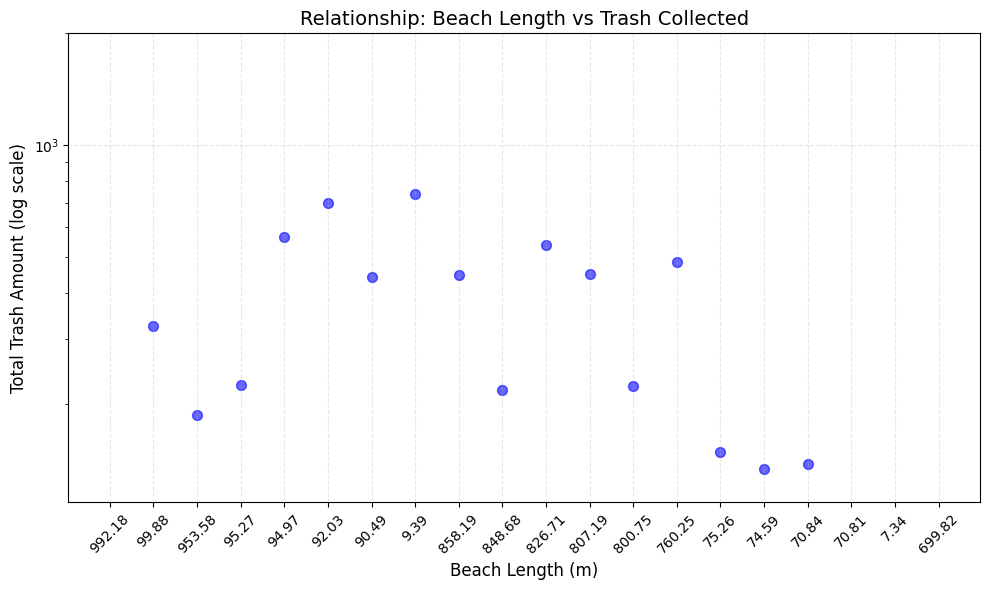

In [287]:
plt.figure(figsize=(10, 6))

# Simple scatter plot
plt.scatter(Litter_per_beach_ploted['length'],
            Litter_per_beach_ploted['Trash amount'],
            alpha=0.6, s=50, color='blue')

plt.xlabel('Beach Length (m)', fontsize=12)
plt.ylabel('Total Trash Amount', fontsize=12)
plt.xticks(rotation = 45)
plt.title('Relationship: Beach Length vs Trash Collected', fontsize=14)

plt.yscale("log")
plt.ylabel("Total Trash Amount (log scale)")

plt.ylim(0, 2000)


# Optional: Add grid for easier reading
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**What went good**

The script can successfully merges two datasets. The first one hold information about the location of the beaches and the second one about the trash that was found at the beach. Then it performs some statistical analysis about the trash distribution at the beaches. For example shows if there more trash at the South or North side of Italy.

---



**What wend bad**

The script needs optimization regarding the structure and code refinement. Also the final plot is not correct.

---


**What could have done better**

The statistical analysis could be more broad and plot more values or extract more meaningful results. Interactive libraries such as plotly could be used.
